# Data Visualization


In order to visualize data for exploration, we usually use `pandas`, `matplotlib` and `seaborn` packages

While numerical summaries are useful for condensing information, visual summaries can provide even more context and detail in a small amount of space.

- Color for visualization: [Color](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)
- Color Palette in Matplotlib: [cmap Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- Color Palette in Seaborn: [cmap Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)
- Viz with Pandas : [Pandas.DataFrame.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
- Viz with Matplotlib: [Matplotlib plot types](https://matplotlib.org/stable/plot_types/index)
- Viz with Seaborn: [Seaborn Plot Gallery](https://seaborn.pydata.org/examples/index.html)

- Histogram: 
    * df.plot.hist()
    * plt.hist()
    * sns.histplot()
- Boxplot: 
    * df.plot.box()
    * plt.boxplot()
    * sns.boxplot()
- Violin Plot: 
    * plt.violinplot()
    * sns.violinplot()
- Bee-swarm Plot: 
    * sns.swarmplot()
- Bar Plot: 
    * df.plot.bar()
    * plt.bar()
    * sns.barplot()
- Scatter Plot: 
    * df.plot.scatter()
    * plt.scatter()
    * sns.scatterplot()
- Line Plot: 
    * df.plot.line()
    * plt.plot()
    * sns.lineplot()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Some of most useful visualization for analysis

- Univariate Analysis: Histogram (continuous variable), Count plot(categorical variable) 
- Bivariate Analysis: Scatter Plot
- Whole dataset Analysis: Correlation matrix plot, Scatter Matrix
- Check for outliers: Boxplot/Violin Plot

In [2]:
data=pd.read_csv('./data/world_happiness_2019.csv')
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [3]:
data.sample(6)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
132,133,Ukraine,4.332,0.820,1.390,0.739,0.178,0.187,0.010
103,104,Gabon,4.799,1.057,1.183,0.571,0.295,0.043,0.055
128,129,Sierra Leone,4.374,0.268,0.841,0.242,0.309,0.252,0.045
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
94,95,Bhutan,5.082,0.813,1.321,0.604,0.457,0.370,0.167
129,130,Sri Lanka,4.366,0.949,1.265,0.831,0.470,0.244,0.047


In [4]:
# Adding categorical feature "Group": High rank, Medium rank, Low rank 
data.loc[:,'Group'] = data['Overall rank'].apply(lambda x: 'High' if x <= 52 else ('Medium' if x <= 104 else 'Low'))
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Group
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Low
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Low
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Low
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Low


========================================================================================================================

## Visualisation of the whole dataset: Correlation Matrix, Scatter Plot Matrix

### Correlation matrix

In [5]:
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
correlation_matrix

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


### Color with conditions
- Pandas
- [df.style.applymap()](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.applymap.html)

In [6]:
def negative_value(x, col1, col2):
    return f"color: {col1 if x < 0 else col2}"
correlation_matrix.style.map(negative_value, col1='red', col2='darkgreen')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


### Color the background in gradient style

- Pandas
- [df.style.background()](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html)

In [7]:
correlation_matrix.style.background_gradient(cmap='viridis')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


### Correlation Matrix in Matplotlib
- Matplotlib 
- [plt.matshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html)

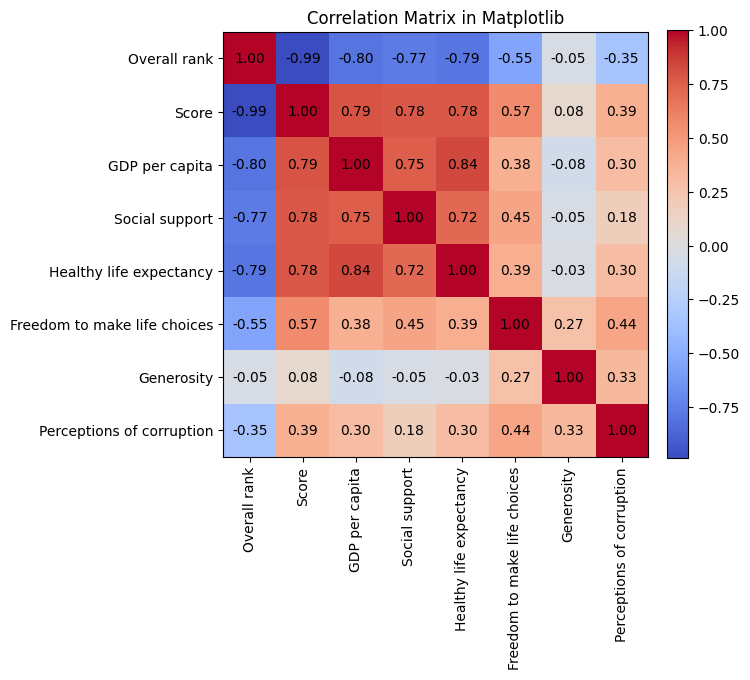

In [8]:

fig, ax = plt.subplots(figsize=(6,6))

# Change color using cmap
cp = ax.matshow(correlation_matrix, cmap='coolwarm')

ax.set_title('Correlation Matrix in Matplotlib')

# Annotate the values into the correlation plot
for (i, j), z in np.ndenumerate(correlation_matrix):
    ax.text(j, i, f'{z:0.2f}', ha='center', va='center')


feature_names = correlation_matrix.columns
# Set ticks and labels
ax.set_xticks(np.arange(len(feature_names)))  # Set the number of ticks equal to the number of features
ax.set_yticks(np.arange(len(feature_names)))

# Assign feature names as tick labels
ax.set_xticklabels(feature_names, rotation=90)  # Rotate x labels for readability
ax.set_yticklabels(feature_names)

#  Move the x-axis labels to the bottom
ax.xaxis.set_ticks_position('bottom')  # Set the x-ticks to be at the bottom
ax.xaxis.set_label_position('bottom')  # Ensure the label is also positioned at the bottom

# Add colorbar
fig.colorbar(cp, ax=ax, fraction=0.046, pad=0.04)

plt.show()

### Correlation Matrix in Seaborn
- Seaborn
- sns.heatmap(df.corr())

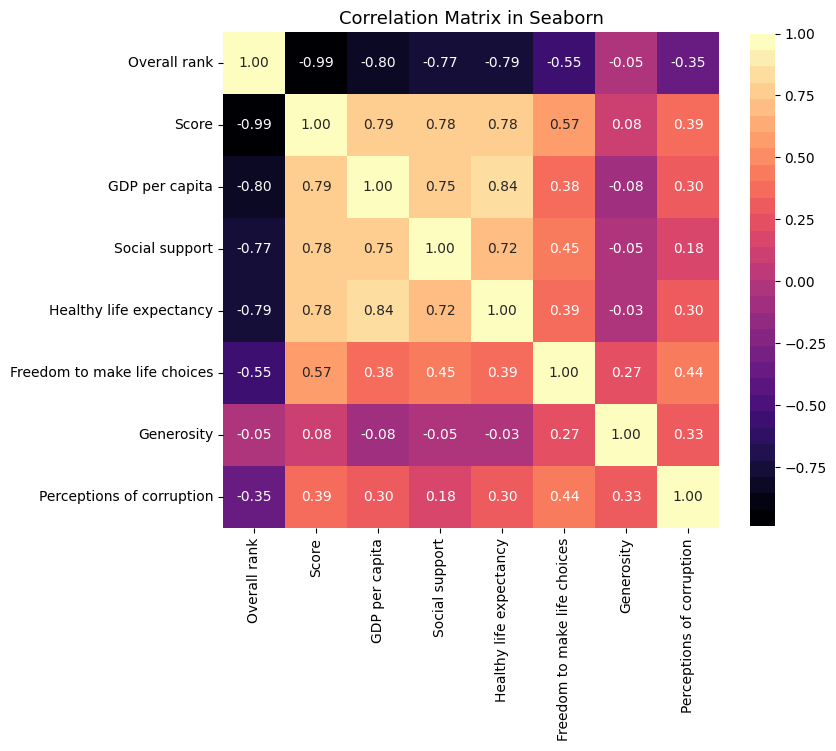

In [9]:
# Correlation Matrix function in Seaborn
fig, ax= plt.subplots(figsize=(8,8))
cmap = plt.get_cmap('magma',30)
ax= sns.heatmap(correlation_matrix, annot=True, fmt="0.2f", square=True
               ,cmap=cmap, cbar_kws={"shrink": 0.8})
ax.set_title('Correlation Matrix in Seaborn', fontsize=13);

# annot=True: annotate values into the corr matrix
# cbar_kws={"shrink": 0.8} : change the size of the colorbar to 0.8 of the plot

### Scatter Plot Matrix (SPLOM)

- Pandas
- [pd.plotting.scatter_matrix()](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)

In [10]:
scatter_matrix_data= data[['Social support','Healthy life expectancy','Score','GDP per capita']]

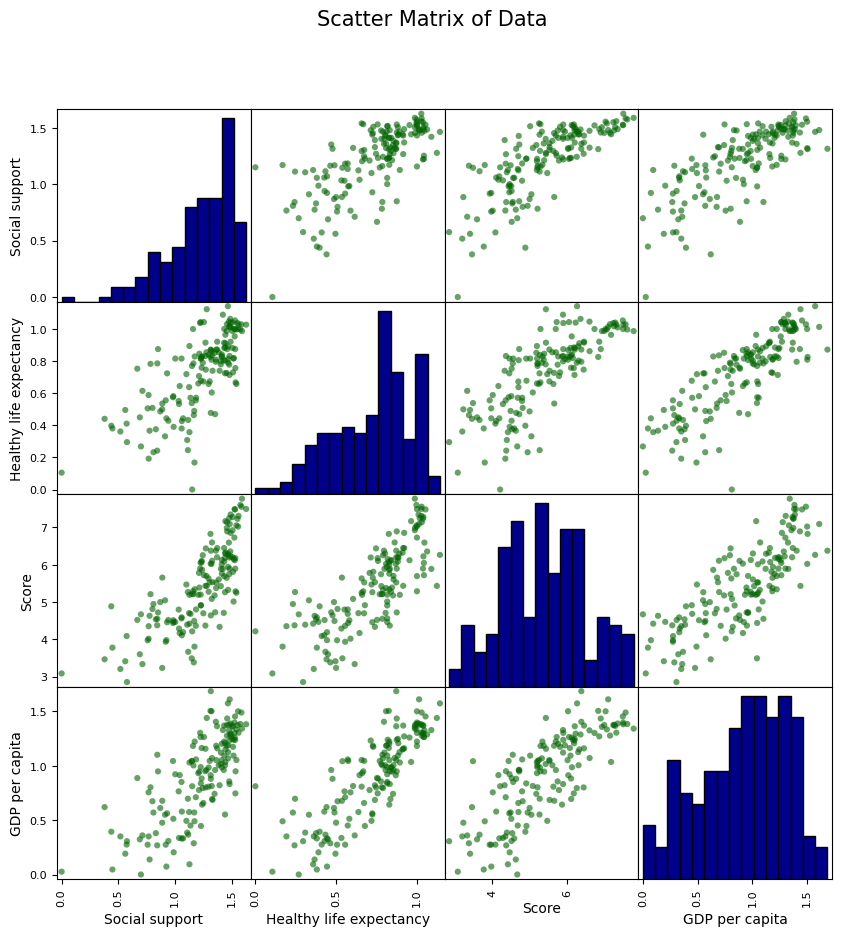

In [11]:
pd.plotting.scatter_matrix(scatter_matrix_data, diagonal='hist', figsize=(10,10),
                           color='darkgreen', marker='.', alpha=0.6, s=80,
                           hist_kwds={'bins':15, 'color':'darkblue','edgecolor':'black'})
plt.suptitle('Scatter Matrix of Data', fontsize=15);

# diagonal: {hist, kde}

In [12]:
# For sake of simplicity, we use pair plot for only 4 attributes
pair_plot_data = data[['Social support','Healthy life expectancy','Score','GDP per capita', 'Group']]

- Seaborn
- [sns.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

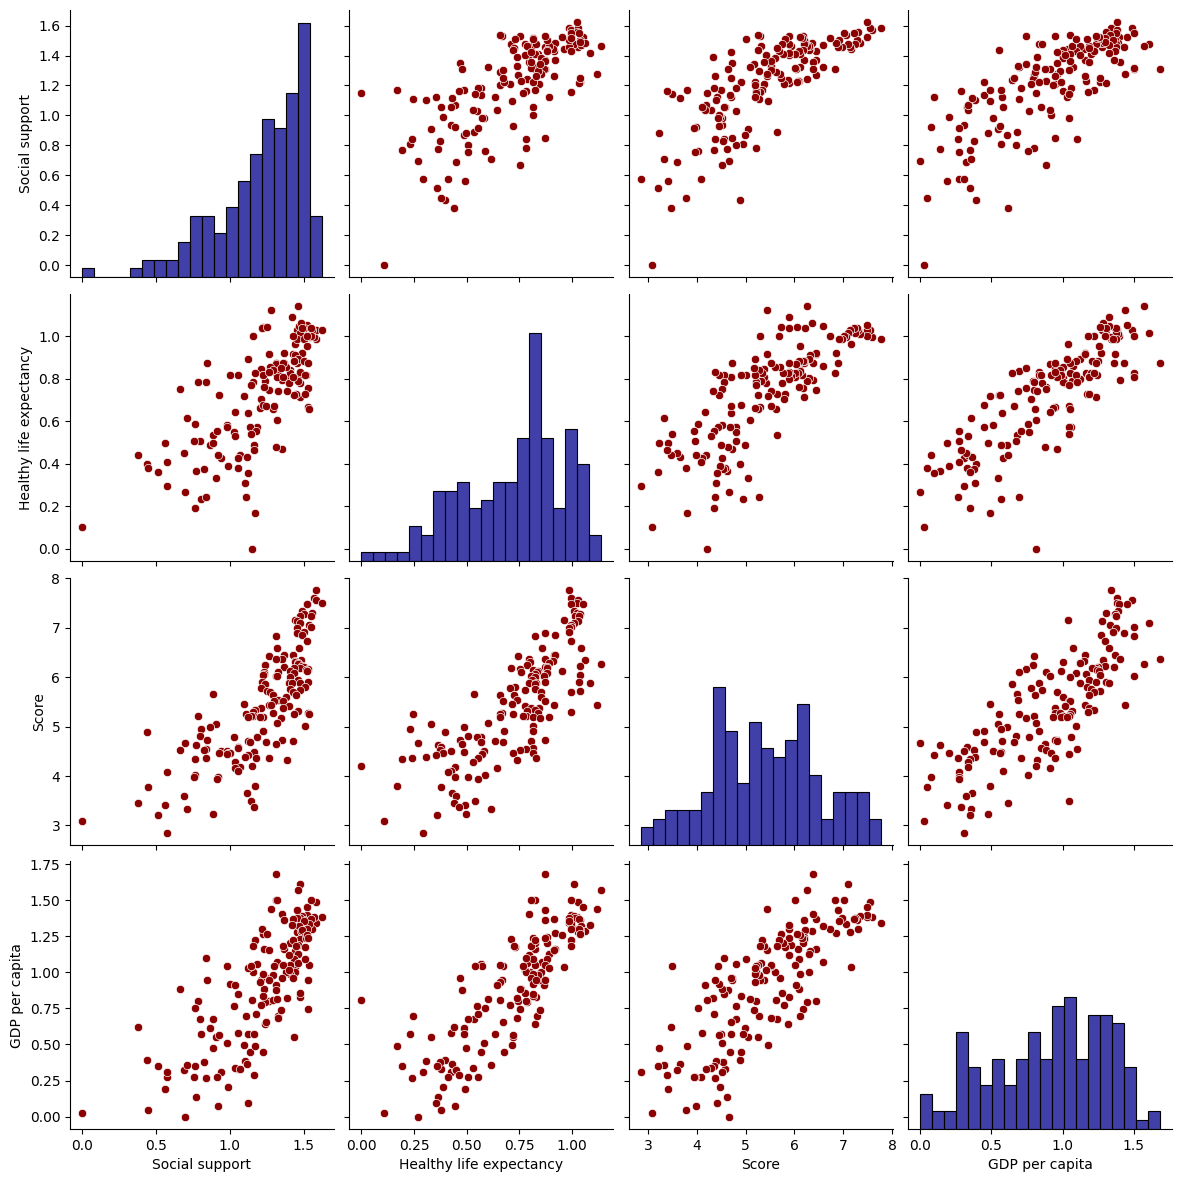

In [13]:
# Pair Plot function in Seaborn
sns.pairplot(data=pair_plot_data, kind='scatter', diag_kws={'bins':20, 'color':'darkblue','edgecolor':'black'},
            plot_kws={'marker':'o','color':'darkred'}, height=3);
# kind: reg(regression line), hist(2d-hist), hex (hex plot), kde (kde), scatter(scatter plot)
# size: size of the plot

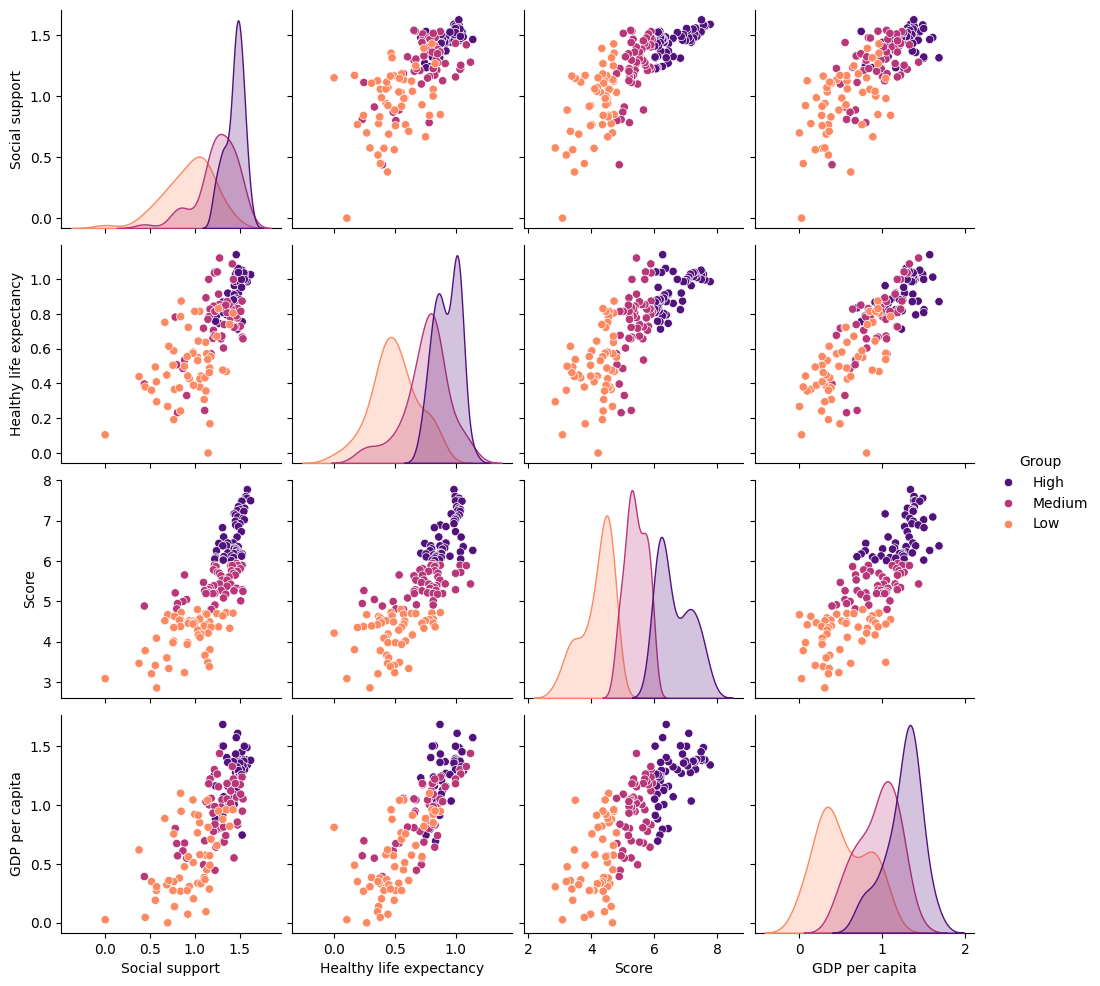

In [14]:
# Pair Plot function in Seaborn by different groups
sns.pairplot(data=pair_plot_data, hue='Group', palette='magma', height=2.5);

## Visualization for one feature: Histogram, Box plot, Violin plot, Bee Swarm plot

### Histogram

- X data: numeric variable
- Function: Observe the distribution of X variable    

In [15]:
histogram_data= data['GDP per capita']

- Pandas
- [df.plot.hist()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html)

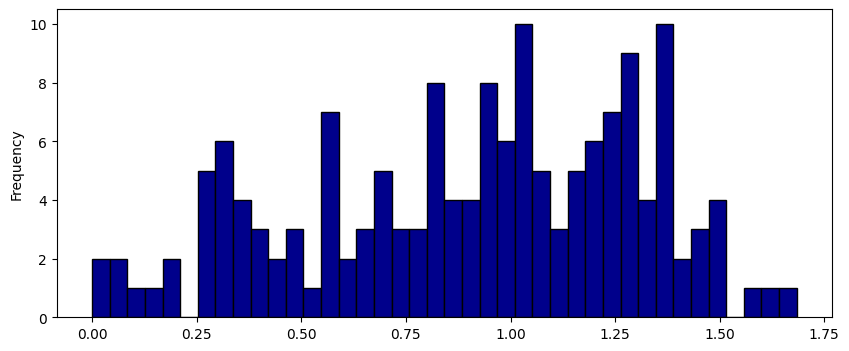

In [16]:
# Histogram function with Pandas
histogram_data.plot.hist(bins=40, color=['darkblue', 'darkgreen'], figsize=(10,4),
                        edgecolor='black', lw=1);

- Matplotlib
- [plt.hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

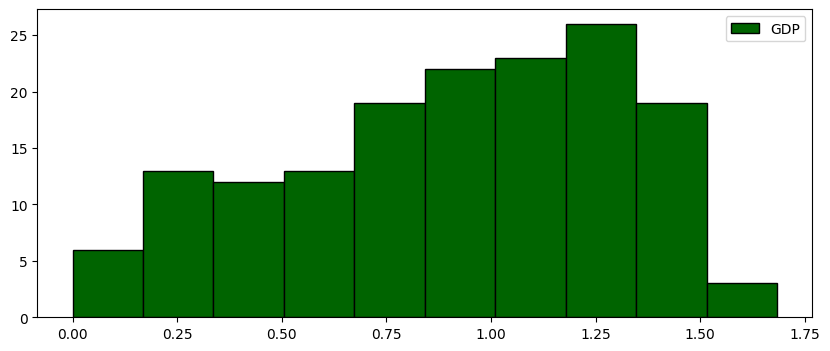

In [17]:
# Histogram function with matplotlib
fig,ax= plt.subplots(figsize=(10,4))
ax.hist(histogram_data, bins=10, color='darkgreen',histtype='barstacked',
        edgecolor='black', label='GDP')
ax.legend(prop ={'size': 10});

- Seaborn
- [sns.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html)

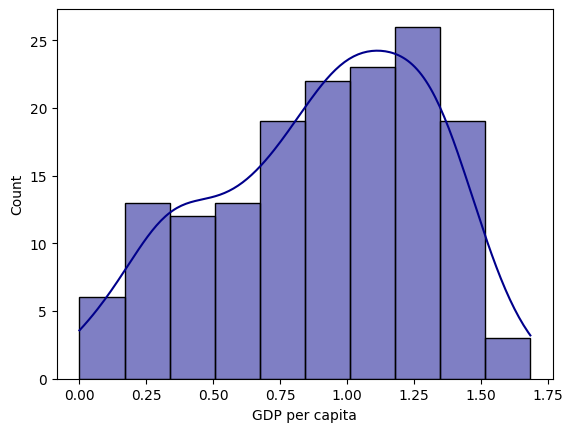

In [18]:
# Histogram function with seaborn
ax=sns.histplot(data=histogram_data, bins=10, 
                color='darkblue', edgecolor='black', kde=True)

In [19]:
# If we want to see the distribution of several features in one graph, we can do it.
histogram_data= data[['GDP per capita', 'Score']]
histogram_data.sample(10)

,GDP per capita,Score
50,1.500,6.021
84,0.696,5.265
30,1.149,6.321
43,1.258,6.118
128,0.268,4.374
115,0.850,4.559
150,0.287,3.380
62,0.855,5.743
140,0.073,3.975
121,0.570,4.490


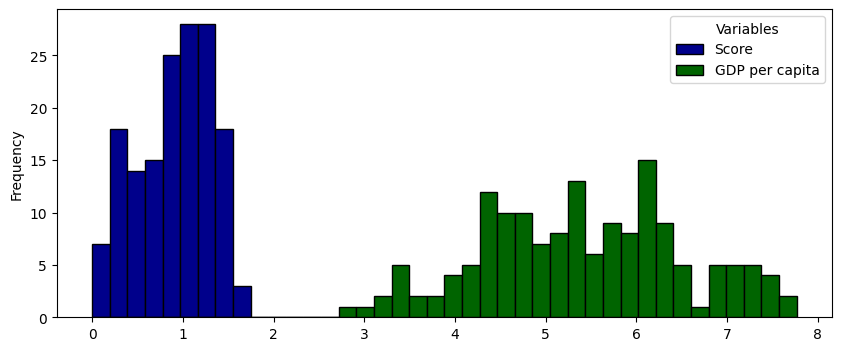

In [20]:
# Histogram function with Pandas
ax = histogram_data.plot.hist(bins=40, color=['darkblue', 'darkgreen'], figsize=(10,4),
                        edgecolor='black', lw=1)
# Add the legend with the title
ax.legend(['Score', 'GDP per capita'], title="Variables");

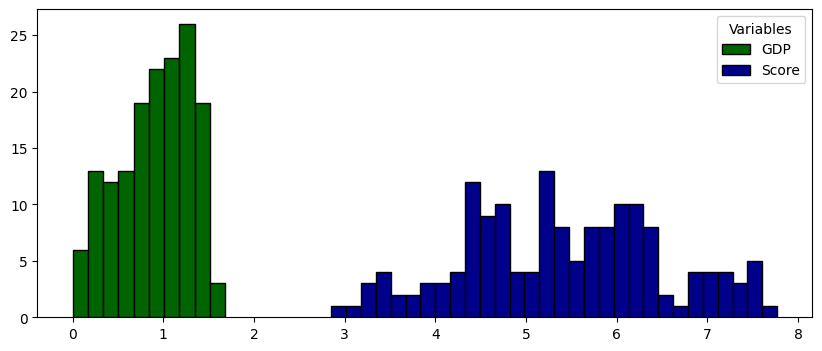

In [21]:
# Histogram function with matplotlib
fig,ax= plt.subplots(figsize=(10,4))
ax.hist(histogram_data['GDP per capita'], bins=10, color='darkgreen',histtype='barstacked',
        edgecolor='black', label='GDP')
ax.hist(histogram_data['Score'], bins=30, color='darkblue',histtype='barstacked',
        edgecolor='black', label='Score');


# Add the legend
ax.legend(prop ={'size': 10}, title="Variables");

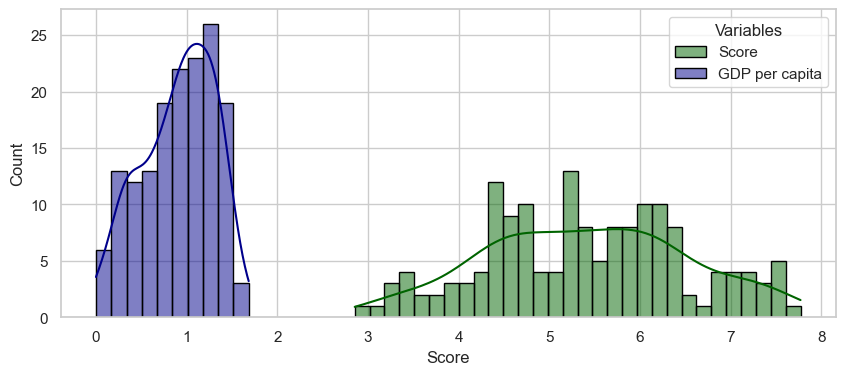

In [22]:
# Histogram function with seaborn
sns.set_theme(rc={'figure.figsize': (10, 4)}, style='whitegrid')

# Plot the first histogram for 'Score'
ax = sns.histplot(x='Score', data=histogram_data, bins=30, 
                  color='darkgreen', edgecolor='black', kde=True, 
                  label='Score')

# Plot the second histogram for 'GDP per capita'
ax = sns.histplot(x='GDP per capita', data=histogram_data, bins=10, 
                  color='darkblue', edgecolor='black', kde=True, 
                  label='GDP per capita')

# Add the legend
plt.legend(title='Variables');

### Box Plot

- X data: numeric variable
- Function: Observe the spread by using metric quartiles (0.25,0.5, 0.75) and see the outliers

In [23]:
# Lets say, we want to see the variation of all numeric variables except for Overall rank and Score
boxplot_data= data.drop(['Overall rank','Country or region', 'Score'], axis=1)
boxplot_data.head(3)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Group
0,1.340,1.587,0.986,0.596,0.153,0.393,High
1,1.383,1.573,0.996,0.592,0.252,0.410,High
2,1.488,1.582,1.028,0.603,0.271,0.341,High


- Pandas
- [df.plot.box()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html)

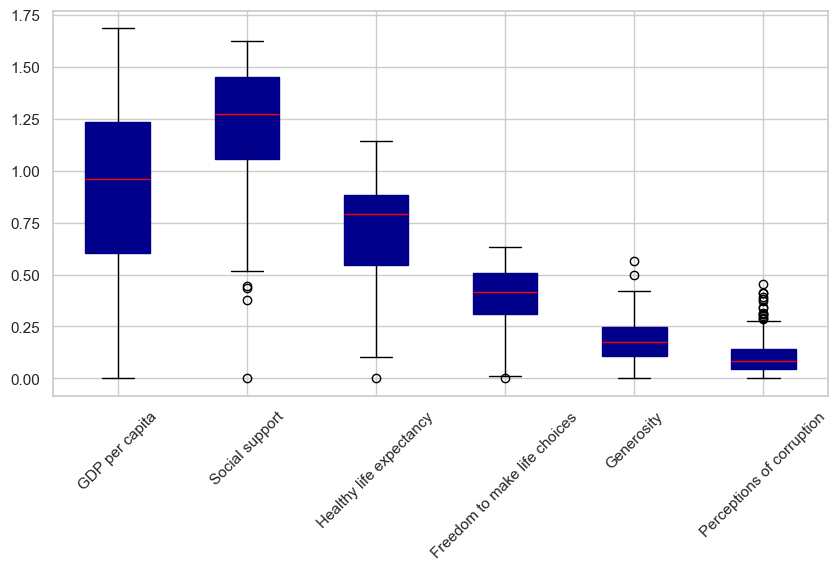

In [24]:
# Set colors for the box 
props = dict(boxes="darkblue", whiskers="black", medians="red", caps="black")
# Box plot function in Pandas
boxplot_data.plot.box(color=props, patch_artist=True, rot=45, figsize=(10,5));

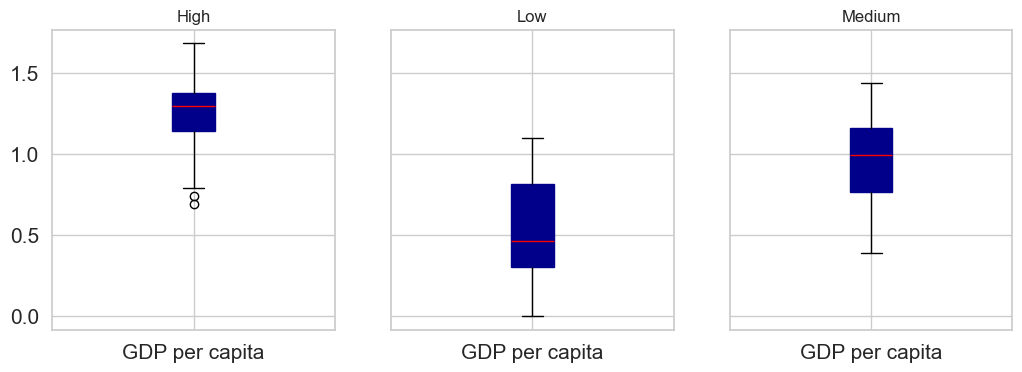

In [25]:
df=boxplot_data
props = dict(boxes="darkblue", whiskers="black", medians="red", caps="black")
df.groupby(by='Group').boxplot(column='GDP per capita',patch_artist=True,
                               color=props,layout=(1,3), fontsize=15, figsize=(12,4));

- Matplotlib 
- [plt.boxplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)

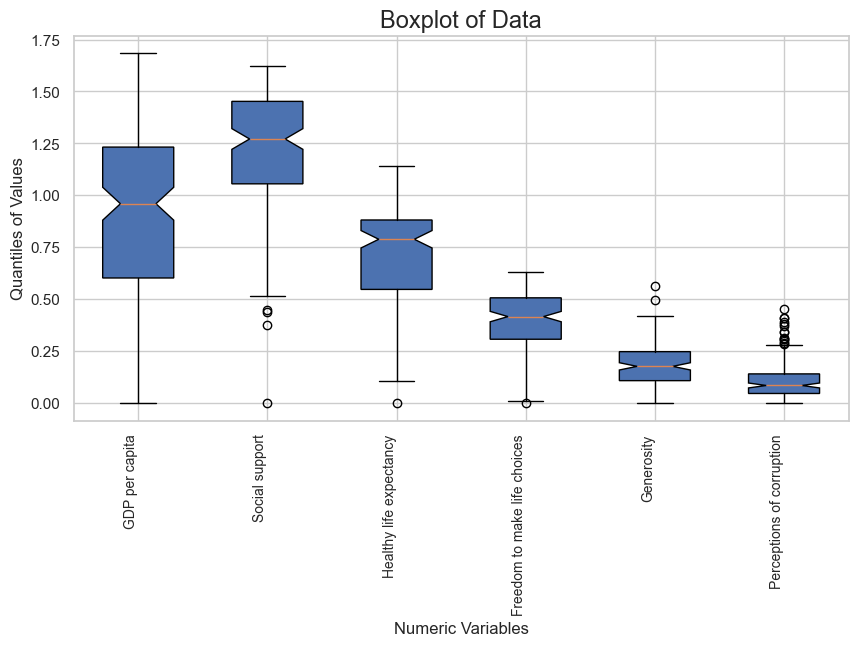

In [26]:
# Boxplot functions in Matplotlib 

# Ensure only numeric columns are included
numeric_data = boxplot_data.select_dtypes(include=['number'])

# Boxplot function in Matplotlib
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(numeric_data, widths=0.55, patch_artist=True, notch=True)
ax.set_title('Boxplot of Data', fontsize=17)
ax.set_xlabel('Numeric Variables', fontsize=12)
ax.set_ylabel('Quantiles of Values', fontsize=12);
ax.set_xticklabels(numeric_data.columns, rotation=90, ha='right', fontsize=10);

# width: width of the box
# patch_artist=True: Box is filled with color 
# notch = True: notch shape

- Seaborn
- [sns.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

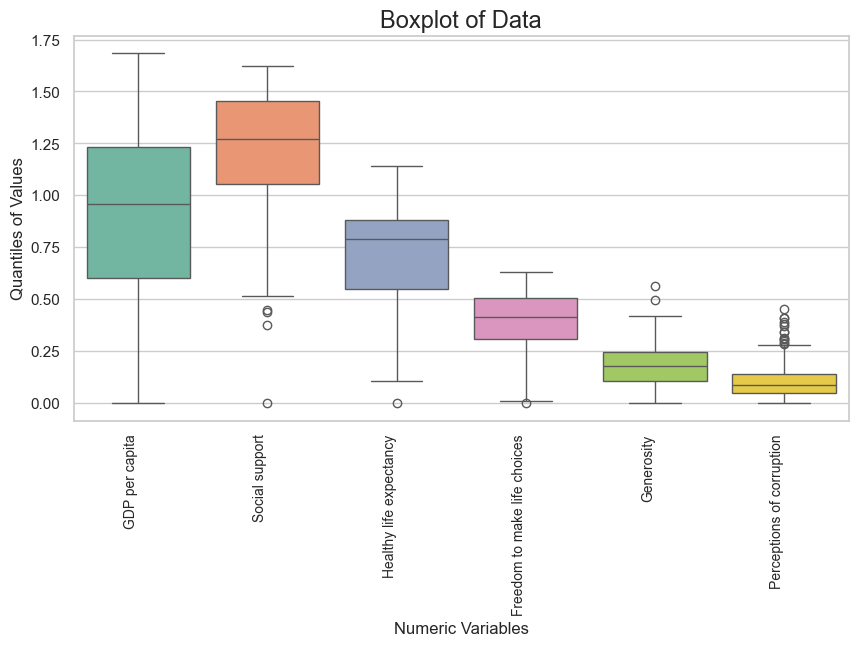

In [27]:
# Boxplot funcion in Seaborn

# Set theme
sns.set_theme(rc={'figure.figsize': (10, 5)}, style='whitegrid')

seaborn_data = boxplot_data.drop(['Group'], axis=1)
# Boxplot function in Seaborn
ax = sns.boxplot(data=seaborn_data, linewidth=1, palette="Set2")

# Set title and labels for the plot
ax.set_title('Boxplot of Data', fontsize=17)
ax.set_xlabel('Numeric Variables', fontsize=12)
ax.set_ylabel('Quantiles of Values', fontsize=12)

# Set the correct number of ticks
ax.set_xticks(range(len(seaborn_data.columns)))

# Set the x-axis labels with rotation
ax.set_xticklabels(seaborn_data.columns, rotation=90, ha='right', fontsize=10);

# Adjust layout and show the plot
# plt.tight_layout()


### Violin Plot

- X data: numeric variable
- Function: same as Boxplot, but can even see the distribution of variable (using KDE method)

In [28]:
# We use same [numerical] data used for boxplot
violin_plot_data = boxplot_data.drop(['Group'], axis=1)

- Matplotlib 
- [plt.violinplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.violinplot.html)

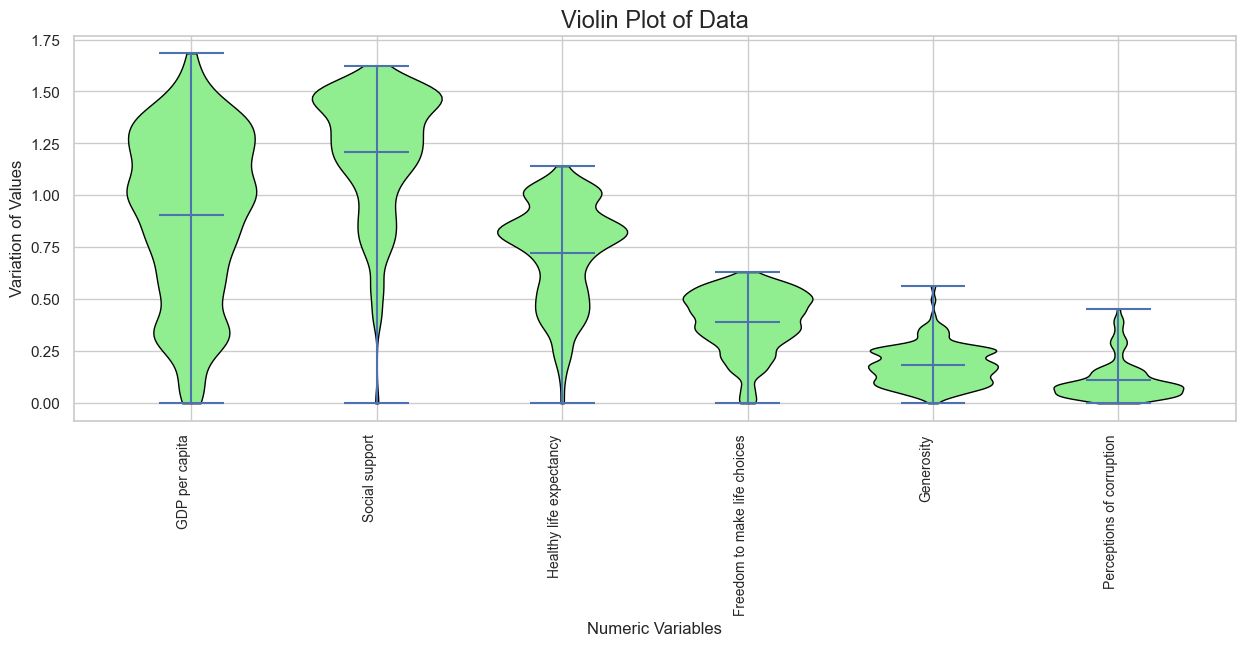

In [29]:
# Violin plot functions in Matplotlib
fig, ax = plt.subplots(figsize=(15, 5))

# Create the violin plot
violin = ax.violinplot(violin_plot_data, widths=0.7, bw_method=0.2,
                       showextrema=True, showmeans=True)

# Set title and labels for the plot
ax.set_title('Violin Plot of Data', fontsize=17)
ax.set_xlabel('Numeric Variables', fontsize=12)
ax.set_ylabel('Variation of Values', fontsize=12)

# Color of the violins
for pc in violin['bodies']:
    pc.set_facecolor('lightgreen')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

# Ensure violin_plot_data is a DataFrame or structured data with named columns
# Set the correct number of ticks (use range starting from 1)
ax.set_xticks(range(1, len(violin_plot_data.columns) + 1))

# Set the x-axis labels with rotation for better readability
ax.set_xticklabels(violin_plot_data.columns, rotation=90, ha='right', fontsize=10);



### Bee Swarm Plot  <a class="anchor" id="2.5"></a>

- X data: numeric variable
- Function: same as Boxplot and Violin plot, but can even see the distribution dots of variable

In [30]:
# We use same data used for boxplot 
swarm_plot_data= data.drop(['Overall rank','Country or region', 'Score'],axis=1)

- Seaborn
- [sns.swarmplot()](https://seaborn.pydata.org/generated/seaborn.swarmplot.html)

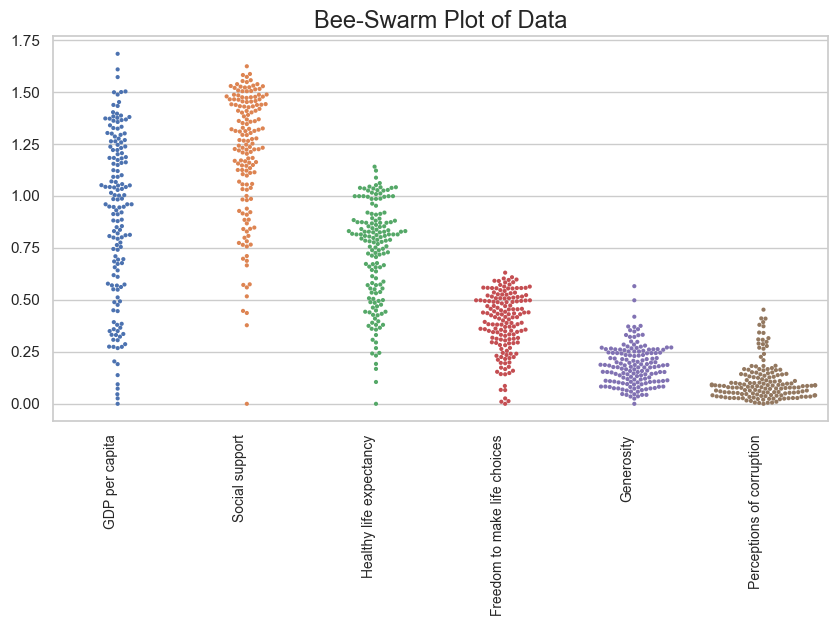

In [31]:
# Bee swarm plot function in Seaborn 
sns.set_theme(style='whitegrid') # theme of the graph
ax=sns.swarmplot(data=swarm_plot_data, size=3)
ax.set_title('Bee-Swarm Plot of Data', fontsize=17);

# Ensure violin_plot_data is a DataFrame or structured data with named columns
# Set the correct number of ticks (use range starting from 1)
ax.set_xticks(range(len(violin_plot_data.columns)))

# Set the x-axis labels with rotation for better readability
ax.set_xticklabels(violin_plot_data.columns, rotation=90, ha='right', fontsize=10);

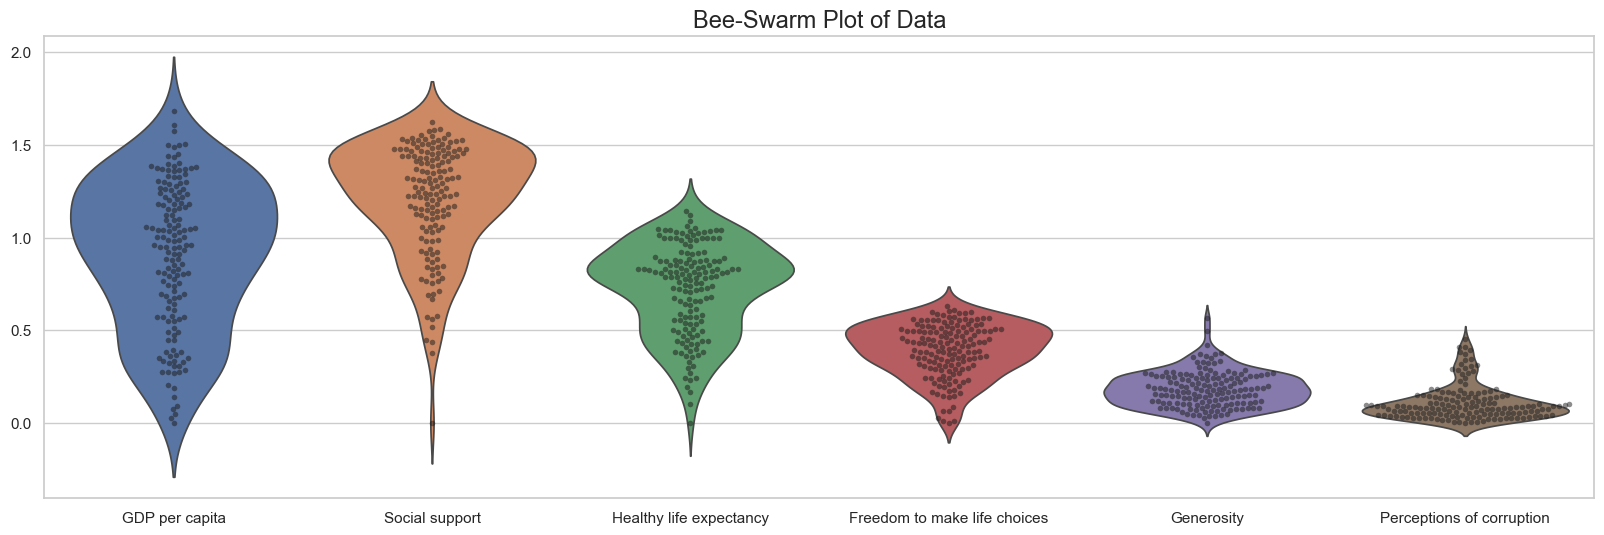

In [32]:
# We can also combine the Violin plot with the Bee-swarm plot
sns.set_theme(rc={'figure.figsize':(20,6)}, style='whitegrid') 
ax=sns.violinplot(data=swarm_plot_data, inner=None)
ax=sns.swarmplot(data=swarm_plot_data, size=4, color='k', alpha=0.5)
ax.set_title('Bee-Swarm Plot of Data', fontsize=17);

========================================================================================================================

## Visualization for two features: Scatter plot, Joint plot

### Scatter Plot <a class="anchor" id="3.2"></a>

- X data: numeric variable
- Y data: numeric variable

In [33]:
# Scatter plot between x:GDP and y:happiness score 
scatter_plot_data= data[['GDP per capita','Perceptions of corruption','Score']]
scatter_plot_data.head()

,GDP per capita,Perceptions of corruption,Score
0,1.340,0.393,7.769
1,1.383,0.410,7.600
2,1.488,0.341,7.554
3,1.380,0.118,7.494
4,1.396,0.298,7.488


- Pandas
- [df.plot.scatter()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)

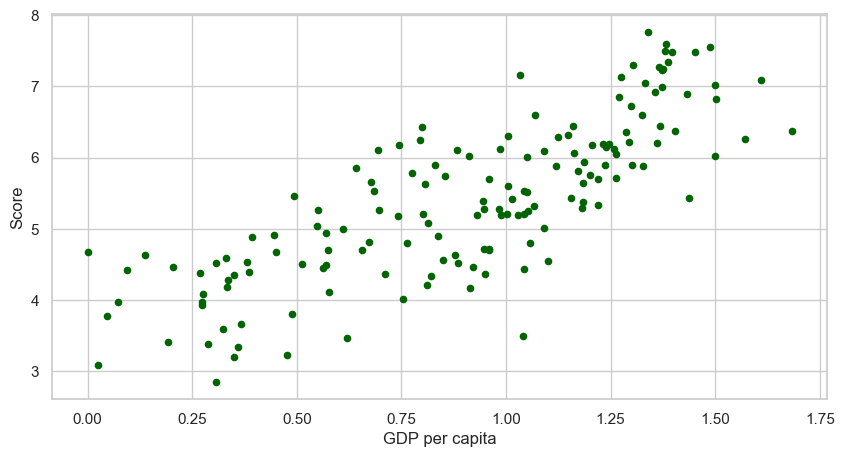

In [34]:
# Scatter plot function in Pandas 
scatter_plot_data.plot.scatter(x='GDP per capita', y='Score', color='darkgreen', figsize=(10,5));

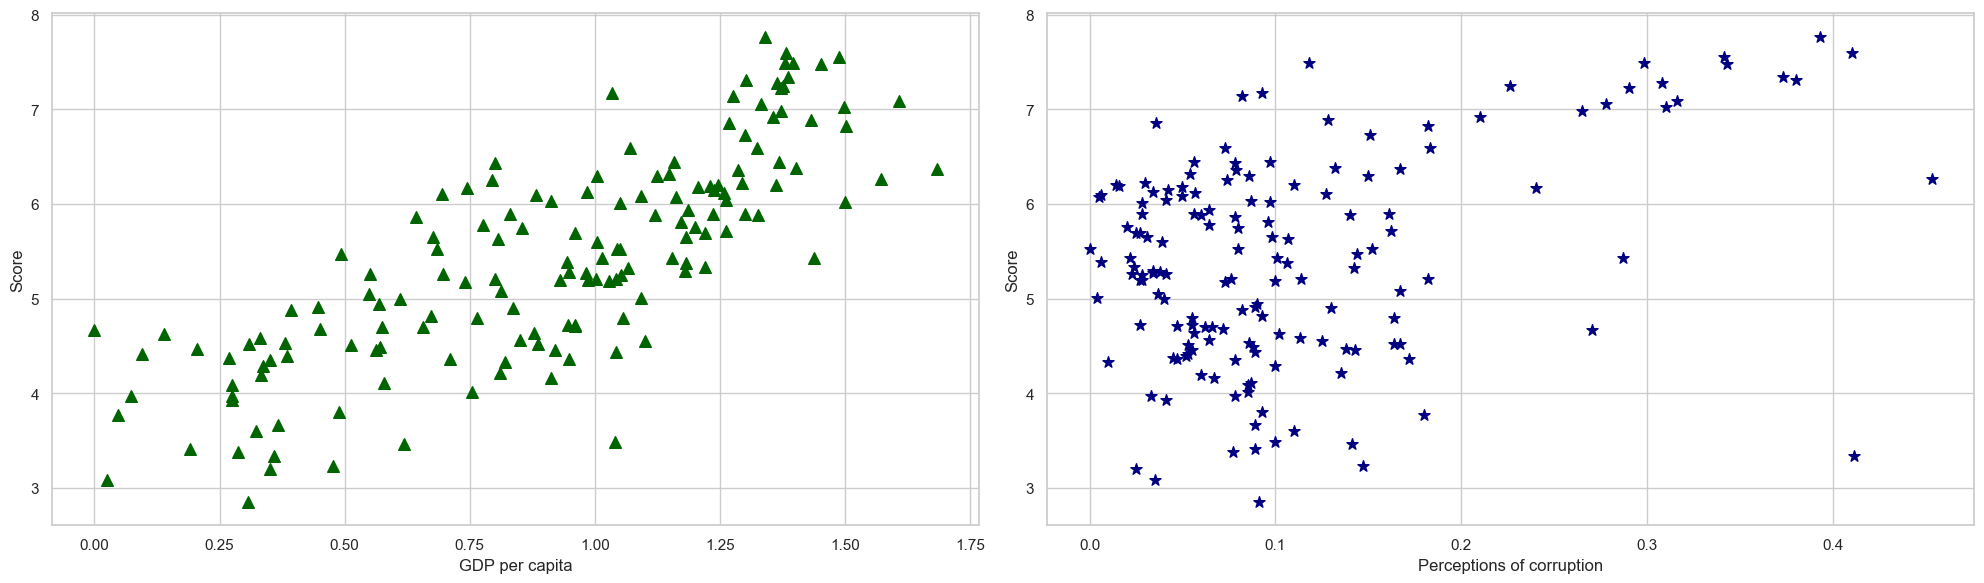

In [35]:
# We can make multiple scatter plot at the same time
fig, ax= plt.subplots(ncols=2)
scatter_plot_data.plot.scatter(x='GDP per capita', y='Score',marker='^',s=70,
                               color='darkgreen',ax=ax[0])
scatter_plot_data.plot.scatter(x='Perceptions of corruption', y='Score',marker='*',s=70, 
                               color='navy',ax=ax[1])
fig.tight_layout();

- Matplotlib
- [plt.scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

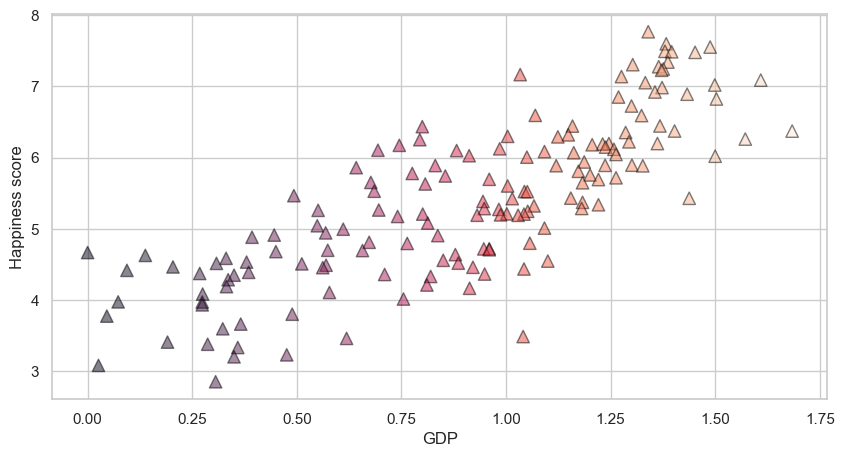

In [36]:
fig,ax= plt.subplots(figsize=(10,5))
ax.scatter(x='GDP per capita', y='Score', data= scatter_plot_data, marker='^',
          s=80, c='GDP per capita', edgecolors='black', alpha=0.5)
ax.set_xlabel('GDP')
ax.set_ylabel('Happiness score');

# s: size of marker
# c: color by variable

- Seaborn
- [sns.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

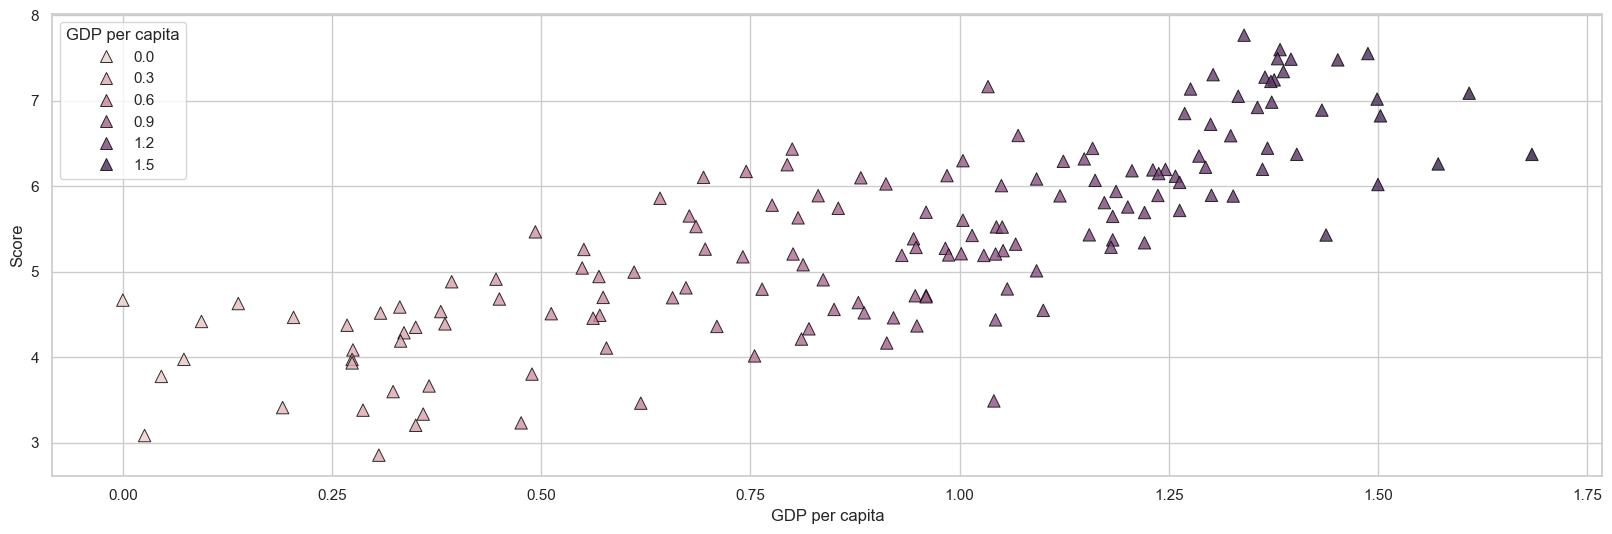

In [37]:
sns.scatterplot(x='GDP per capita', y='Score', hue='GDP per capita',data= scatter_plot_data,
                marker='^', s=80, edgecolor='black', alpha=0.8);

### Joint Plot

- X data: numeric variable
- Y data: numeric variable
- Function: Combine scatter plot of X,Y data,and combine with histograms of each 

In [38]:
# Imagine, we want to see the relationship between Social support and Life expectancy and distribution of each one 
# And we also interested in how they are related by groups
joint_plot_data= pair_plot_data

- Seaborn
- [sns.jointplot()](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

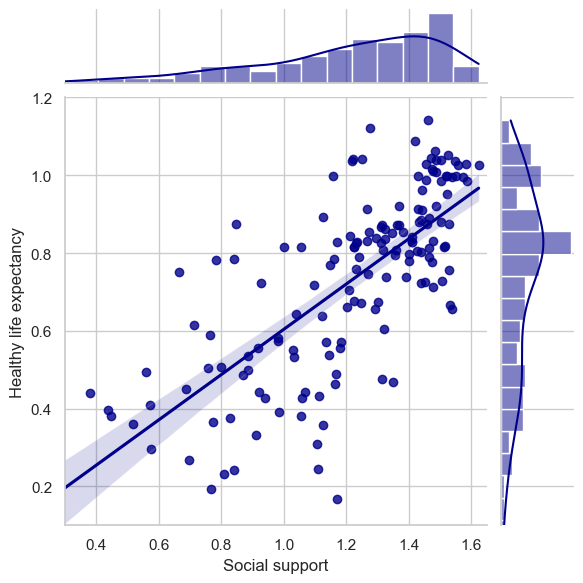

In [39]:
# Joint Plot in Seaborn
sns.jointplot(x='Social support', y='Healthy life expectancy',data=joint_plot_data, 
              xlim=(0.3,1.65), ylim=(0.1,1.2),color='darkblue',marginal_kws={"bins": 20}, kind='reg');

# kind: reg(regression line), hist(2d-hist), hex (hex plot), kde (kde)
# marginal_kws : marginal plots on the side

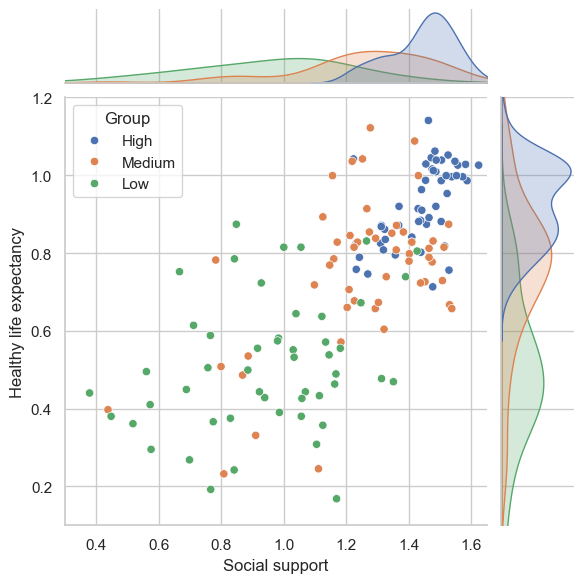

In [40]:
# Joint Plot in Seaborn by groups
sns.jointplot(x='Social support', y='Healthy life expectancy',data=joint_plot_data, 
              xlim=(0.3,1.65), ylim=(0.1,1.2),hue='Group');